# Lab 6. Getting to tidy data. TODO: finish the challenge

## Tidy data is a framework to structure data sets so they can be easily analyzed and visualized. 

## What is tidy data? Hadley Wickham’s paper defines it as meeting the following criteria:
■ Each row is an observation.

■ Each column is a variable.

■ Each type of observational unit forms a table.

## This session will cover:

1. Unpivoting/melting/gathering columns into rows
2. Pivoting/casting/spreading rows into columns
3. Normalizing data by separating a dataframe into multiple tables
4. Assembling data from multiple parts

# 1. Let's load some libraries

In [3]:
import pandas as pd

In [4]:
from matplotlib.pyplot import figure

# 2. Let's load and concatenate some datasets

In [28]:
## The air_quality_no2_long.csv data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.
air_quality_no2 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_no2_long.csv',parse_dates=True)

In [29]:
air_quality_no2

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [30]:
air_quality_no2.groupby('city').count()

,country,date.utc,location,parameter,value,unit
city,,,,,,
Antwerpen,95,95,95,95,95,95
London,969,969,969,969,969,969
Paris,1004,1004,1004,1004,1004,1004


In [31]:
air_quality_no2.sort_values(by='date.utc',ascending=True)

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


# 3. Reshaping by pivoting DataFrame objects

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png">



In [32]:
air_quality_no2_pivoted=air_quality_no2.pivot(index='date.utc', columns='city', values='value')

In [33]:
air_quality_no2_pivoted

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,NaN,21.4
2019-06-20 21:00:00+00:00,NaN,NaN,24.9
2019-06-20 22:00:00+00:00,NaN,NaN,26.5


<Figure size 2880x2160 with 0 Axes>

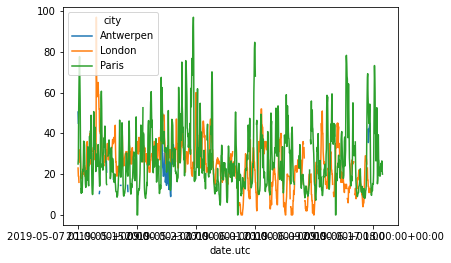

In [34]:
figure(figsize=(40,30))
air_quality_no2_pivoted.plot(figsize=(40,30)§)

# 4. Reshaping by melting DataFrame objects

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

In [22]:
air_quality_no2_pivoted.head()

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4


In [23]:
# we need to extract the index to a new column
air_quality_no2_pivoted.reset_index( inplace=True)

In [24]:
air_quality_no2_pivoted

city,date.utc,Antwerpen,London,Paris
0,2019-05-07 01:00:00+00:00,50.5,23.0,25.0
1,2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2,2019-05-07 03:00:00+00:00,NaN,19.0,50.4
3,2019-05-07 04:00:00+00:00,NaN,16.0,61.9
4,2019-05-07 05:00:00+00:00,NaN,NaN,72.4
...,...,...,...,...
1028,2019-06-20 20:00:00+00:00,NaN,NaN,21.4
1029,2019-06-20 21:00:00+00:00,NaN,NaN,24.9
1030,2019-06-20 22:00:00+00:00,NaN,NaN,26.5
1031,2019-06-20 23:00:00+00:00,NaN,NaN,21.8


In [26]:
air_quality_no2_pivoted.melt(id_vars=['date.utc'])

,date.utc,city,value
0,2019-05-07 01:00:00+00:00,Antwerpen,50.5
1,2019-05-07 02:00:00+00:00,Antwerpen,45.0
2,2019-05-07 03:00:00+00:00,Antwerpen,NaN
3,2019-05-07 04:00:00+00:00,Antwerpen,NaN
4,2019-05-07 05:00:00+00:00,Antwerpen,NaN
...,...,...,...
3094,2019-06-20 20:00:00+00:00,Paris,21.4
3095,2019-06-20 21:00:00+00:00,Paris,24.9
3096,2019-06-20 22:00:00+00:00,Paris,26.5
3097,2019-06-20 23:00:00+00:00,Paris,21.8
